## import some libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Loading my dataset

In [113]:
Dataset = pd.read_csv("Titanic-Dataset.csv")
Dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Preprocess The DataSet

### describing our dataset

In [114]:
Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### getting the shape

In [115]:
Dataset.shape

(891, 12)

### knowing those that survived and didn't

In [116]:
Dataset["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [117]:
### from the above we will know that '0' is people that didn't survive than '1' is for survivals
### more people died than survived

## Next we want to perform some visual representations

### First comparing the Survived to Pclass

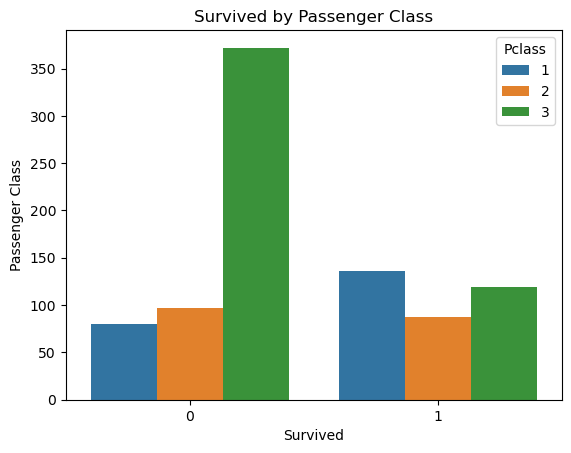

In [118]:
sn.countplot(data=Dataset, x='Survived', hue='Pclass')
plt.title('Survived by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Passenger Class')
plt.show()

In [119]:
### so from the above we will know for Passenger Class3, has highest survival
### count than the other classes in '0'
### also Passenger Class1 has the highest survival count than the other classes '1'

# Second comparing the Survived to Age

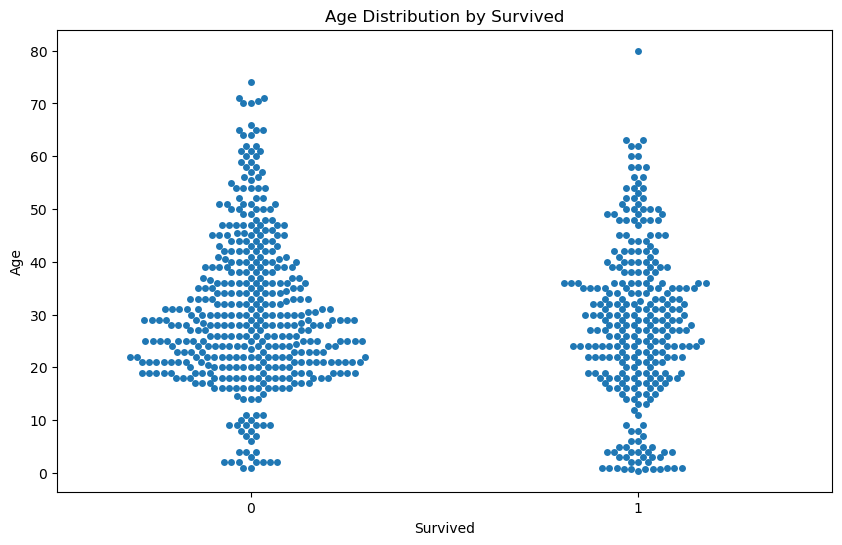

In [120]:
plt.figure(figsize=(10, 6))
sn.swarmplot(data=Dataset, x='Survived', y='Age')
plt.title('Age Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [121]:
### from the above we can easily know that between 10 to 30, mosst of them died and others

### Second comparing the Survived to Sex: male or female

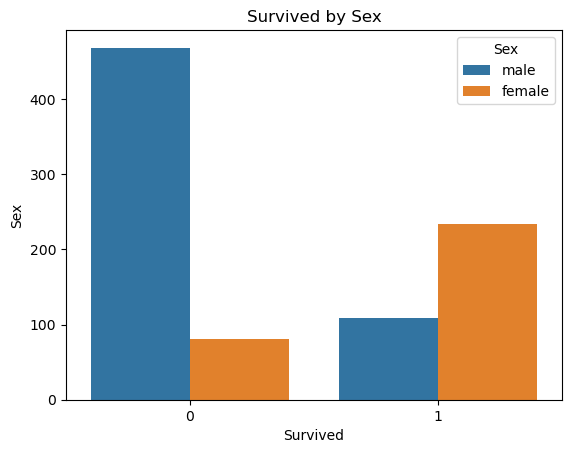

In [122]:
sn.countplot(data=Dataset, x='Survived', hue='Sex')
plt.title('Survived by Sex')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()

In [123]:
### from the above we will notice that from '0' more males didn't survive  and from '1', 
### more females survived

In [124]:
### so now we want a model that tell whether a person survived or not
### so I will use the pclass and sex to best determine the survived state of a person

In [125]:
Dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [126]:
### with the sex we will first transforn it from categorical to numeric

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Dataset['Sex'] = labelencoder.fit_transform(Dataset['Sex'])
Dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [127]:
### from the above, the Sex is now 0 and 1

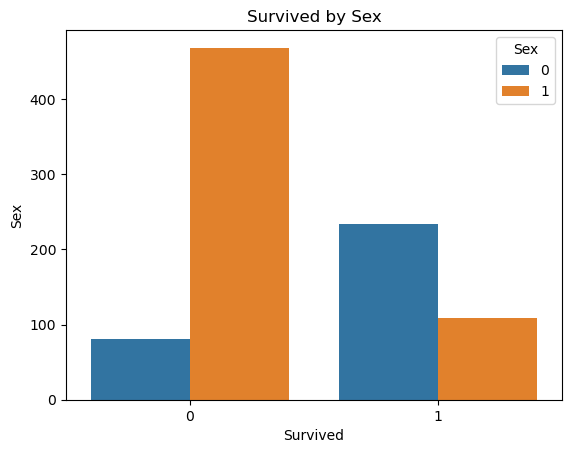

In [128]:
### lets verify if it worked
sn.countplot(data=Dataset, x='Survived', hue='Sex')
plt.title('Survived by Sex')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()

## DataSet Cleaning

In [129]:
### lets drop the age column became some are missen

Dataset.drop(columns=['Age'], inplace=True)
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S


### Training the Model

In [130]:
X =  Dataset[['Pclass', 'Sex']]
Y = Dataset['Survived']

### import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### data is splitted into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Initialize and train the model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

### Model Prediction

In [131]:
### Predict the target variable which is Survived on the testing set which are Sex and Pclass
Y_pred = model.predict(X_test)
print(Y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]


### Checking Accuracy Of Model

In [132]:
# Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 78.2122905027933


### For Users To Be Able to Predict

In [133]:
### For Users to be able to use it

import warnings
warnings.filterwarnings("ignore")

response = model.predict([[2,0]])

if(response==0):
    print("Sorry, Didn't Survive")
    
else:
    print("Survived")

Survived
